# Setup Import a few common modules, ensure MatplotLib plots figures inline. 

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [76]:
all_dummies = pd.read_csv("../data/cleaned/all_plant_dummies.csv")

In [77]:
all_dummies.head()

,Unnamed: 0,Unnamed: 0.1,bee_count,year,month,state,county,Latitude,Longitude,scientificName,...,plant_Symphoricarpos albus,plant_Taraxacum officinale,plant_Tilia sp.,plant_Trifolium pratense,plant_Trifolium repens,plant_Trifolium sp.,plant_Verbascum thapsus,plant_Vicia sp.,plant_Withheld,plant_Zigadenus sp.
0,0,0,1,2009,6,Alabama,Bibb,33.04519,-87.00591,Bombus pensylvanicus,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,2009,6,Alabama,Dallas,32.21282,-86.97015,Bombus pensylvanicus,...,0,0,0,0,0,0,0,0,0,0
2,2,2,5,2008,7,Arkansas,Benton,36.10147,-94.43522,Bombus pensylvanicus,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,2008,7,Arkansas,Washington,35.82071,-94.15895,Bombus pensylvanicus,...,0,0,0,0,0,0,0,0,0,0
4,4,4,10,2009,8,Illinois,Champaign,39.93715,-88.27055,Bombus pensylvanicus,...,0,0,0,0,0,0,0,0,0,0


In [78]:
print(all_dummies["year"].value_counts())
print(all_dummies["month"].value_counts())


2009    4611
2008    3644
2010    1106
2007     850
Name: year, dtype: int64
7    5306
8    3727
6     806
0     359
9      13
Name: month, dtype: int64


In [79]:
#all_dummies = pd.get_dummies(all_dummies, columns = ['month', 'year'])


In [80]:
all_dummies_1 = all_dummies.drop(['fips','Unnamed: 0', 'Unnamed: 0.1', 'scientificName', 'state','Latitude', 'Longitude', 'lat', 'lon', 'elevation', "year", 'month'], axis =1)

In [81]:
all_dummies_1.head()

,bee_count,county,mean_temp,wind_gust,precipitation,plant_Achillea sp.,plant_Agastache sp.,plant_Allium sp.,plant_Antennaria sp.,plant_Aster sp.,...,plant_Symphoricarpos albus,plant_Taraxacum officinale,plant_Tilia sp.,plant_Trifolium pratense,plant_Trifolium repens,plant_Trifolium sp.,plant_Verbascum thapsus,plant_Vicia sp.,plant_Withheld,plant_Zigadenus sp.
0,1,Bibb,44.1,28.000000,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Dallas,44.8,26.000000,0.29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,Benton,49.9,26.000000,0.54,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Washington,36.1,21.819549,0.16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,Champaign,51.5,28.000000,0.32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


bee_count                        1.000000
plant_Cirsium sp.                0.145488
Unnamed: 0                       0.067296
Unnamed: 0.1                     0.067296
mean_temp                        0.032428
                                   ...   
plant_Epilobium parviflorum     -0.025737
plant_Epilobium angustifolium   -0.026277
plant_Trifolium sp.             -0.027185
plant_Withheld                  -0.029982
plant_Lupinus sp.               -0.031238
Name: bee_count, Length: 90, dtype: float64


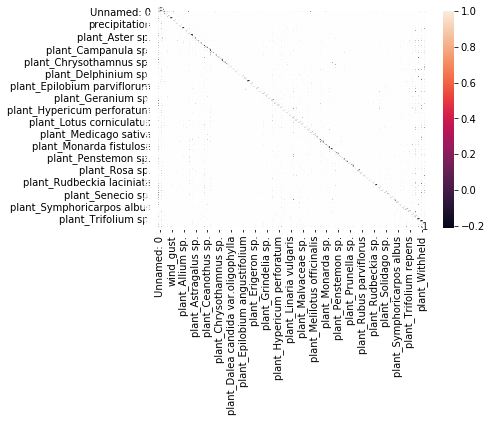

In [58]:
import seaborn as sns
correlation_map = all_dummies_1.corr()
print(correlation_map['bee_count'].sort_values(ascending=False))
sns.heatmap(correlation_map, annot=True)

In [83]:
#Creating a dictionary for the county feature and converting county labels to dictionary values

county_label = { ni: n for n,ni in enumerate(set(all_dummies_1['county']))}
all_dummies_1['county'] = all_dummies_1['county'].map(county_label)
all_dummies_1.head()

,bee_count,county,mean_temp,wind_gust,precipitation,plant_Achillea sp.,plant_Agastache sp.,plant_Allium sp.,plant_Antennaria sp.,plant_Aster sp.,...,plant_Symphoricarpos albus,plant_Taraxacum officinale,plant_Tilia sp.,plant_Trifolium pratense,plant_Trifolium repens,plant_Trifolium sp.,plant_Verbascum thapsus,plant_Vicia sp.,plant_Withheld,plant_Zigadenus sp.
0,1,163,44.1,28.000000,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,31,44.8,26.000000,0.29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,130,49.9,26.000000,0.54,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,40,36.1,21.819549,0.16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,192,51.5,28.000000,0.32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
from sklearn.decomposition import PCA

#instantiation of principal component object
pca = PCA()
X_features = all_dummies_1.drop(['bee_count'], axis =1)

In [85]:
from sklearn.preprocessing import StandardScaler
#transforming features vector to have comparable scales
X_scaled = StandardScaler().fit_transform(X_features)

In [86]:
#performing pca on transfromed features assuming principal components are equal to 4
pca =PCA(n_components = 0.95)
X_pca =pca.fit_transform(X_scaled)
y = all_dummies_1['bee_count']

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import PoissonRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [88]:
#selecting 70% of unbalanced dataset for model training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size = 0.3, random_state = 0)

In [89]:
#function to obtain model metrics to judge the quality of the estimated models

def score_estimator(estimator, X_test):
    """Score an estimator on the test set."""
    y_pred = estimator.predict(X_test)

    print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
    print("MAE: %.3f" % mean_absolute_error(y_test, y_pred))
    print("R_square: %.3f" % r2_score(y_test, y_pred))

    # Ignore non-positive predictions, as they are invalid for
    # the Poisson deviance.
    mask = y_pred > 0
    if (~mask).any():
        n_masked, n_samples = (~mask).sum(), mask.shape[0]
        print(f"WARNING: Estimator yields invalid, non-positive predictions "
              f" for {n_masked} samples out of {n_samples}. These predictions "
              f"are ignored when computing the Poisson deviance.")

    print("mean Poisson deviance: %.3f" % mean_poisson_deviance(y_test, y_pred))

In [90]:
poisson_glm = PoissonRegressor(max_iter =500)
poisson_glm.fit(X_train,y_train)

PoissonRegressor(max_iter=500)

In [91]:
print("Poisson evaluation:")
score_estimator(poisson_glm, X_test)

Poisson evaluation:
MSE: 19.452
MAE: 1.348
R_square: 0.021
mean Poisson deviance: 2.604


# Loading both unbalanced and balanced dataset for model estimation

In [2]:
#Reading in cleaned data
data_unbalanced = pd.read_csv("../data/cleaned/cleaned_unbalanced") 
data_balanced = pd.read_csv("../data/cleaned/cleaned_balanced") 

In [3]:
data_unbalanced.describe()

,Unnamed: 0,bee_count,county,mean_temp,wind_gust,precipitation,plant_Achillea sp.,plant_Asteraceae sp.,plant_Brassica sp.,plant_Cirsium sp.,plant_Delphinium sp.,plant_Epilobium latifolium,plant_Erigeron sp.,plant_Lathyrus sp.,plant_Lotus corniculatus,plant_Phacelia sp.,plant_Rubus allegheniensis,plant_Scrophularia sp.
count,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000
mean,5105.000000,1.755949,112.949760,49.569089,21.819549,0.110642,0.000490,0.001567,0.000588,0.539320,0.002546,0.005190,0.000196,0.001665,0.000686,0.000979,0.002057,0.000979
std,2947.806133,4.813259,64.339467,13.900134,4.616043,0.291077,0.022124,0.039555,0.024235,0.498476,0.050399,0.071861,0.013995,0.040771,0.026175,0.031281,0.045305,0.031281
min,0.000000,0.000000,0.000000,-4.700000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2552.500000,1.000000,57.000000,38.800000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5105.000000,1.000000,121.000000,48.000000,21.819549,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7657.500000,1.000000,167.000000,59.800000,22.000000,0.110642,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10210.000000,106.000000,210.000000,81.300000,58.100000,11.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data_balanced.describe()

,Unnamed: 0,bee_count,county,mean_temp,wind_gust,precipitation,plant_Achillea sp.,plant_Asteraceae sp.,plant_Brassica sp.,plant_Cirsium sp.,plant_Delphinium sp.,plant_Epilobium latifolium,plant_Erigeron sp.,plant_Lathyrus sp.,plant_Lotus corniculatus,plant_Phacelia sp.,plant_Rubus allegheniensis,plant_Scrophularia sp.
count,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000,10194.000000
mean,3832.428978,0.882382,119.625466,51.031578,21.908384,0.152653,0.000294,0.000589,0.000392,0.482637,0.001177,0.002452,0.000098,0.000883,0.000392,0.000589,0.000981,0.000196
std,2653.258509,3.622991,69.472673,11.473608,4.320892,0.259650,0.017153,0.024255,0.019806,0.499723,0.034291,0.049464,0.009904,0.029702,0.019806,0.024255,0.031307,0.014006
min,0.000000,0.000000,0.000000,-0.800000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1710.250000,0.000000,45.000000,43.100000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3405.500000,0.000000,134.000000,52.809351,21.819549,0.067054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5136.750000,1.000000,201.000000,55.039139,21.840592,0.270003,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10210.000000,106.000000,209.000000,81.300000,58.100000,11.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model Estimation (Unbalanced Dataset)

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import PoissonRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [9]:
#selecting the features in X vector and target into y vector
X = data_unbalanced.drop(['bee_count', 'Unnamed: 0'], axis =1)
y= data_unbalanced['bee_count']

#Scaling features to put them in similar scales
X = preprocessing.scale(X)

#selecting 70% of unbalanced dataset for model training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


In [10]:
#function to obtain model metrics to judge the quality of the estimated models

def score_estimator(estimator, X_test):
    """Score an estimator on the test set."""
    y_pred = estimator.predict(X_test)

    print("MSE: %.3f" % mean_squared_error(y_test, y_pred))
    print("MAE: %.3f" % mean_absolute_error(y_test, y_pred))
    print("R_square: %.3f" % r2_score(y_test, y_pred))

    # Ignore non-positive predictions, as they are invalid for
    # the Poisson deviance.
    mask = y_pred > 0
    if (~mask).any():
        n_masked, n_samples = (~mask).sum(), mask.shape[0]
        print(f"WARNING: Estimator yields invalid, non-positive predictions "
              f" for {n_masked} samples out of {n_samples}. These predictions "
              f"are ignored when computing the Poisson deviance.")

    print("mean Poisson deviance: %.3f" % mean_poisson_deviance(y_test, y_pred))

## Estimating the base poisson model: unbalanced dataset


In [12]:
poisson_glm = PoissonRegressor(max_iter =500)
poisson_glm.fit(X_train,y_train)

PoissonRegressor(max_iter=500)

In [13]:
print("Poisson evaluation:")
score_estimator(poisson_glm, X_test)

Poisson evaluation:
MSE: 19.481
MAE: 1.353
R_square: 0.019
mean Poisson deviance: 2.621


## Estimating the base advanced poisson model (Poisson Gradient Boosting): unbalanced dataset


In [14]:
poisson_gbrt = HistGradientBoostingRegressor(loss="poisson")

poisson_gbrt.fit(X_train,y_train)

HistGradientBoostingRegressor(loss='poisson')

In [15]:
print("Poisson Gradient Boosted Trees evaluation:")
score_estimator(poisson_gbrt, X_test)

Poisson Gradient Boosted Trees evaluation:
MSE: 16.443
MAE: 0.969
R_square: 0.172
mean Poisson deviance: 1.638


# Conducting a 10 fold cross-valuation to evaluate our base model and complex model: looking out for overfitting


In [16]:
from sklearn.model_selection import cross_val_score

In [18]:
#Base Model
scores = cross_val_score(poisson_glm, X_train,y_train, scoring="neg_mean_squared_error", cv=10)

base_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(base_rmse_scores)

Scores: [5.4396588  4.09690902 4.88243645 5.42987268 5.47456953 3.81203673
 5.44850086 3.6485185  5.4710752  4.90071251]
Mean: 4.860429027110769
Standard deviation: 0.7006127616832672


In [19]:
#Gradient Boosting Model
scores = cross_val_score(poisson_gbrt, X_train,y_train, scoring="neg_mean_squared_error", cv=10)

gradient_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(gradient_rmse_scores)

Scores: [5.15175766 3.9080967  4.90058501 4.72415325 5.20649176 3.70648416
 5.39038145 3.57262667 5.34550158 4.37624233]
Mean: 4.628232057746258
Standard deviation: 0.6582707099472574


# Re-estimating the same poisson models above with corrected imbalanced dataset 

In [20]:
#Groupin the feature variables and target variable to be used to obtain trainset and test set samples
X_sm = data_balanced.drop(['bee_count', 'Unnamed: 0'], axis =1)
y_sm = data_balanced['bee_count']
X_sm = preprocessing.scale(X_sm)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,y_sm, test_size = 0.3, random_state = 0)

In [21]:
#Creating a function to get the accuracy metrics
def score_estimator(estimator, X_test_sm):
    """Score an estimator on the test set."""
    y_pred_sm = estimator.predict(X_test_sm)

    print("MSE: %.3f" % mean_squared_error(y_test_sm, y_pred_sm))
    print("MAE: %.3f" % mean_absolute_error(y_test_sm, y_pred_sm))
    print("R_square: %.3f" % r2_score(y_test_sm, y_pred_sm))

    # Ignore non-positive predictions, as they are invalid for
    # the Poisson deviance.
    mask = y_pred_sm > 0
    if (~mask).any():
        n_masked, n_samples = (~mask).sum(), mask.shape[0]
        print(f"WARNING: Estimator yields invalid, non-positive predictions "
              f" for {n_masked} samples out of {n_samples}. These predictions "
              f"are ignored when computing the Poisson deviance.")

    print("mean Poisson deviance: %.3f" % mean_poisson_deviance(y_test_sm, y_pred_sm))

In [22]:
#Estimating the base poisson model for the corrected imbalanced dataset
poisson_glm_sm = PoissonRegressor(max_iter =500)
poisson_glm_sm.fit(X_train_sm,y_train_sm)

print("Poisson evaluation:")
score_estimator(poisson_glm_sm, X_test_sm)


Poisson evaluation:
MSE: 10.637
MAE: 0.896
R_square: 0.015
mean Poisson deviance: 2.469


In [23]:
#Estimating advanced poisson model for the corrected imbalanced dataset
poisson_gbrt_sm = HistGradientBoostingRegressor(loss="poisson")
poisson_gbrt_sm.fit(X_train_sm,y_train_sm)

print("Poisson Gradient Boosted Trees evaluation:")
score_estimator(poisson_gbrt_sm, X_test_sm)

Poisson Gradient Boosted Trees evaluation:
MSE: 8.794
MAE: 0.556
R_square: 0.185
mean Poisson deviance: 1.031


# Conducting a 10 fold cross-valuation to evaluate our base model and complex model: looking out for overfitting

In [25]:
#Base Model:corrected imbalanced data
scores = cross_val_score(poisson_glm_sm, X_train_sm,y_train_sm, scoring="neg_mean_squared_error", cv=10)

base_bal_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(base_rmse_scores)

Scores: [5.4396588  4.09690902 4.88243645 5.42987268 5.47456953 3.81203673
 5.44850086 3.6485185  5.4710752  4.90071251]
Mean: 4.860429027110769
Standard deviation: 0.7006127616832672


In [26]:
#Gradient Boosting Model
scores = cross_val_score(poisson_gbrt_sm, X_train_sm,y_train_sm, scoring="neg_mean_squared_error", cv=10)

gradient_bal_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(gradient_bal_rmse_scores)

Scores: [3.95278341 3.95152085 1.87932318 4.60756379 2.34732763 3.25033708
 3.05134789 2.87392961 3.93151966 5.13068098]
Mean: 3.497633409229954
Standard deviation: 0.9535033555337673


# Hyper-parameter Tuning  of the Gradient Boost Model: Corrected Imbalanced dataset

In [70]:
#importing relevant libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# fix all parameters and changed n_estimators
param_test1 = {'max_depth':range(8,20,2), 'min_samples_leaf':range(30,100,10),
              "max_iter" : range(70,150,10), "max_leaf_nodes" : range(20, 40, 5)}
gsearch1 = GridSearchCV(estimator = HistGradientBoostingRegressor(loss="poisson", learning_rate =0.1, random_state=10), 
              param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=10)
gsearch1.fit(X_sm,y_sm)

/Users/ericasa1/opt/anaconda3/envs/insight/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=HistGradientBoostingRegressor(loss='poisson',
                                                     random_state=10),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(8, 20, 2),
                         'max_iter': range(70, 150, 10),
                         'max_leaf_nodes': range(20, 40, 5),
                         'min_samples_leaf': range(30, 100, 10)},
             scoring='neg_mean_squared_error')

In [71]:
gsearch1.best_params_

{'max_depth': 10,
 'max_iter': 140,
 'max_leaf_nodes': 25,
 'min_samples_leaf': 30}

In [72]:
poisson_gbrt_tuned  = HistGradientBoostingRegressor(loss="poisson", learning_rate =0.1, random_state=10,
                             max_depth = 10, max_iter = 140, max_leaf_nodes = 25, min_samples_leaf = 30)
poisson_gbrt_tuned.fit(X_train_sm,y_train_sm)

HistGradientBoostingRegressor(loss='poisson', max_depth=10, max_iter=140,
                              max_leaf_nodes=25, min_samples_leaf=30,
                              random_state=10)

In [73]:
print("Poisson evaluation:")
score_estimator(poisson_gbrt_tuned, X_test_sm)

Poisson evaluation:
MSE: 7.809
MAE: 0.558
R_square: 0.277
mean Poisson deviance: 0.948


In [74]:
#Hypertuned Gradient Boosting Model
scores = cross_val_score(poisson_gbrt_tuned, X_train_sm, y_train_sm, scoring="neg_mean_squared_error", cv=10)

gradient_rmse_scores_tuned = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(gradient_rmse_scores_tuned)

Scores: [3.73165821 3.92185602 1.84536181 4.48385154 2.31890616 3.25873746
 2.83118497 2.85729018 3.93817857 5.16832014]
Mean: 3.4355345054539064
Standard deviation: 0.9583701623832052


## Saving final model: Poisson Gradient Boosting. It performed better than the base model

In [75]:
import joblib

poissontree_model = open("poisson_tree.pkl","wb")
joblib.dump(poisson_gbrt_tuned,poissontree_model)
poissontree_model.close()